# LABORATORIO 1


## 1. Carga de los Datos

1.1 Carga de librerias

In [1847]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

1.2 Carga Datos

In [1848]:
#Carga de datos
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

df = pd.read_csv('./training_data.csv')


1.3 Información Basica de los Datos

In [1849]:
df_dim = df.shape
print(">> El dataset estructurado contiene " + str(df_dim[1]) + " columnas y "+ str(df_dim[0]) +" filas.\n")
print(">> La estructura de los datos es la siguiente: ")

#Muestra de primeros datos
df.head() 


>> El dataset estructurado contiene 18 columnas y 4000 filas.

>> La estructura de los datos es la siguiente: 


,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465


## 2. Entendimiento de los Datos

Se genera una réplica del Dataset que contiene los datos, esto con la finalidad de prevenir la sobrescritura de la información y modificaciones no deseadas en el conjunto original, garantizando así su integridad. 

In [1850]:
data = df.copy()

Los tipos de datos en cada una de las columnas son los siguientes:

In [1851]:
data.dtypes

objid         int64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
score       float64
clean         int64
class        object
redshift    float64
mjd           int64
rowv        float64
colv        float64
dtype: object

Como se puede observar, solo una columna representa una variable en formato de texto, mientras que las demás corresponden a variables numéricas.

**Perfilamiento de datos**

Se emplea el método describe() de Pandas para obtener una descripción de las columnas del dataset. A continuación, se analizan medidas de tendencia central, dispersión y otras características relevantes.

In [1852]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.237649e+18,185.523295,0.248959,18.609049,17.363397,16.839856,16.597712,16.439392,743.829000,3.37625,419.602000,0.851765,0.895500,0.134015,52957.124750,0.000218,-0.000090
std,4.244222e+11,41.689446,2.001075,0.839431,0.950964,1.055343,1.141252,1.190502,98.865936,1.69909,167.162063,0.071311,0.305946,0.379742,1601.148131,0.008794,0.007457
min,1.237646e+18,10.469743,-1.252763,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.00000,19.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.474666,-0.631824,18.170375,16.796110,16.190785,15.870782,15.628205,752.000000,2.00000,311.000000,0.836866,1.000000,0.000106,51821.000000,-0.001212,-0.001609
50%,1.237649e+18,195.815451,0.053336,18.843745,17.472525,16.850835,16.571195,16.402665,756.000000,3.00000,434.000000,0.860675,1.000000,0.032038,51986.000000,0.000322,0.000125
75%,1.237649e+18,214.348425,0.593396,19.261563,17.997818,17.506640,17.258833,17.147037,756.000000,5.00000,527.000000,0.879834,1.000000,0.086479,54468.000000,0.001698,0.001672
max,1.237650e+18,249.758313,13.854010,19.599750,22.497450,22.265960,28.179630,20.847690,1035.000000,6.00000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


## 2.1 Exploración de Datos

Para realizar la exploración de datos, se optó por el uso de la librería Pandas Profiling. Primero, se instala y se importa el reporte.

In [1853]:
""" import pandas as pd
from ydata_profiling import ProfileReport

# Generar el informe de exploración
profile = ProfileReport(data, explorative=True)
report_file = "data_report.html"
profile.to_file(report_file)

import webbrowser
webbrowser.open(report_file)

print(f"El informe ha sido guardado en {report_file}.") """

' import pandas as pd\nfrom ydata_profiling import ProfileReport\n\n# Generar el informe de exploración\nprofile = ProfileReport(data, explorative=True)\nreport_file = "data_report.html"\nprofile.to_file(report_file)\n\nimport webbrowser\nwebbrowser.open(report_file)\n\nprint(f"El informe ha sido guardado en {report_file}.") '

## 2.2 Verificación calidad de datos

A partir de los datos obtenidos podemos observar que se encontraron duplicados, correlaciones altas y desbalance de clases, a continuacion vamos a explicar y detallar cada uno de estos reporte para poder abordar los datos de la mejor manera.

Se detectaron 17 filas duplicadas, lo que representa el 0.4% del dataset. Para esto, se procedera a revisar estos registros y considerar su eliminación o consolidación, dependiendo de la naturaleza de los datos.

Se identificaron múltiples variables con alta correlación entre sí, lo que puede indicar redundancia en los datos y posibles problemas de colinealidad en modelos futuros. Se analizarán estas correlaciones y se evaluará su conservacion dependiendo de la importancia que tenga para realizar el calculo del redshift.

## 3. Limpieza de Datos 
Este proceso de limpieza se relizará en 4 pasos Completitud, Duplicidad, Consistencia y Estadarización.

**3.1 Completitud** 

Es importante identificar si existen filas con valores vacíos y determinar si las variables presentan un porcentaje significativo de datos faltantes.

In [1854]:
#Completitud 
data.isnull().sum()    

objid       0
ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
score       0
clean       0
class       0
redshift    0
mjd         0
rowv        0
colv        0
dtype: int64

Se toma la decisión de no eliminar ninguna variable bajo este criterio, ya que ninguna presenta un nivel de significancía importante.

**3.2 Duplicidad**

Se buscarán registros duplicados y se eliminan.

In [1855]:
#Filas duplicadas
data.duplicated().sum()

np.int64(17)

Observamos que existen 17 registros duplicados

In [1856]:
data = data.drop_duplicates()
data=data.dropna()
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


Como se observa, al momento de generar los elemenos duplicado esos se reducen a 0.

**3.3 Consistencia**

Para este caso analizamos las restricciones en ciertas variables y evaluamos la mejor desición a tomar para cada caso en especifico.

In [1857]:
#Verificación de Valores Fuera de Rango

#Redshift es una distancia, no puede ser negativa
print("Redshift negativos:", (data["redshift"] < 0).sum())
#El score debe estar entre 0 y 1
print("Score fuera de rango:", ((data["score"] < 0) | (data["score"] > 1)).sum())
#clean solo puede tener dos valores 1 y 0 (Es confiable o no)
print("Valores únicos en 'clean':", data["clean"].unique())
#Indicando la cantidad de tipos de cuerpos celestes
data["class"].value_counts()

Redshift negativos: 646
Score fuera de rango: 0
Valores únicos en 'clean': [1 0]


class
GALAXY    1847
STAR      1625
QSO        291
S          175
G           44
QUASAR       1
Name: count, dtype: int64

Como observamos encontramos 648 registros con la variable redshift negativa, sin score fuera de rango y valores dispersos únicos en clean. Para esto procederemos a modificar los datos de manera objetiva.

In [1858]:
# Eliminación de redshift negativo 
data.drop(data[data["redshift"] < 0].index, inplace =True)
#Eliminación mediciones no confiables
data.drop(data[data["clean"] == 0].index, inplace =True)

#Corrección de valores atipicos de class
data.loc[data["class"] == "G", "class"] = "GALAXY"
data.loc[data["class"] == "S", "class"] = "STAR"
data.loc[data["class"] == "QUASAR", "class"] = "QSO"



print("Redshift negativos:", (data["redshift"] < 0).sum())
print("Score fuera de rango:", ((data["score"] < 0) | (data["score"] > 1)).sum())
print("Valores únicos en 'clean':", data["clean"].unique())

Redshift negativos: 0
Score fuera de rango: 0
Valores únicos en 'clean': [1]


**3.4 Estandarización**

Seaborn se utiliza junto con Matplotlib para visualizar el conjunto de datos y detectar valores atípicos (outliers). Para ello, se emplea un diagrama de cajas, el cual representa la media, los cuartiles y destaca los valores atípicos de manera clara.

>> Se visualizan los datos en el siguiente grafico: 


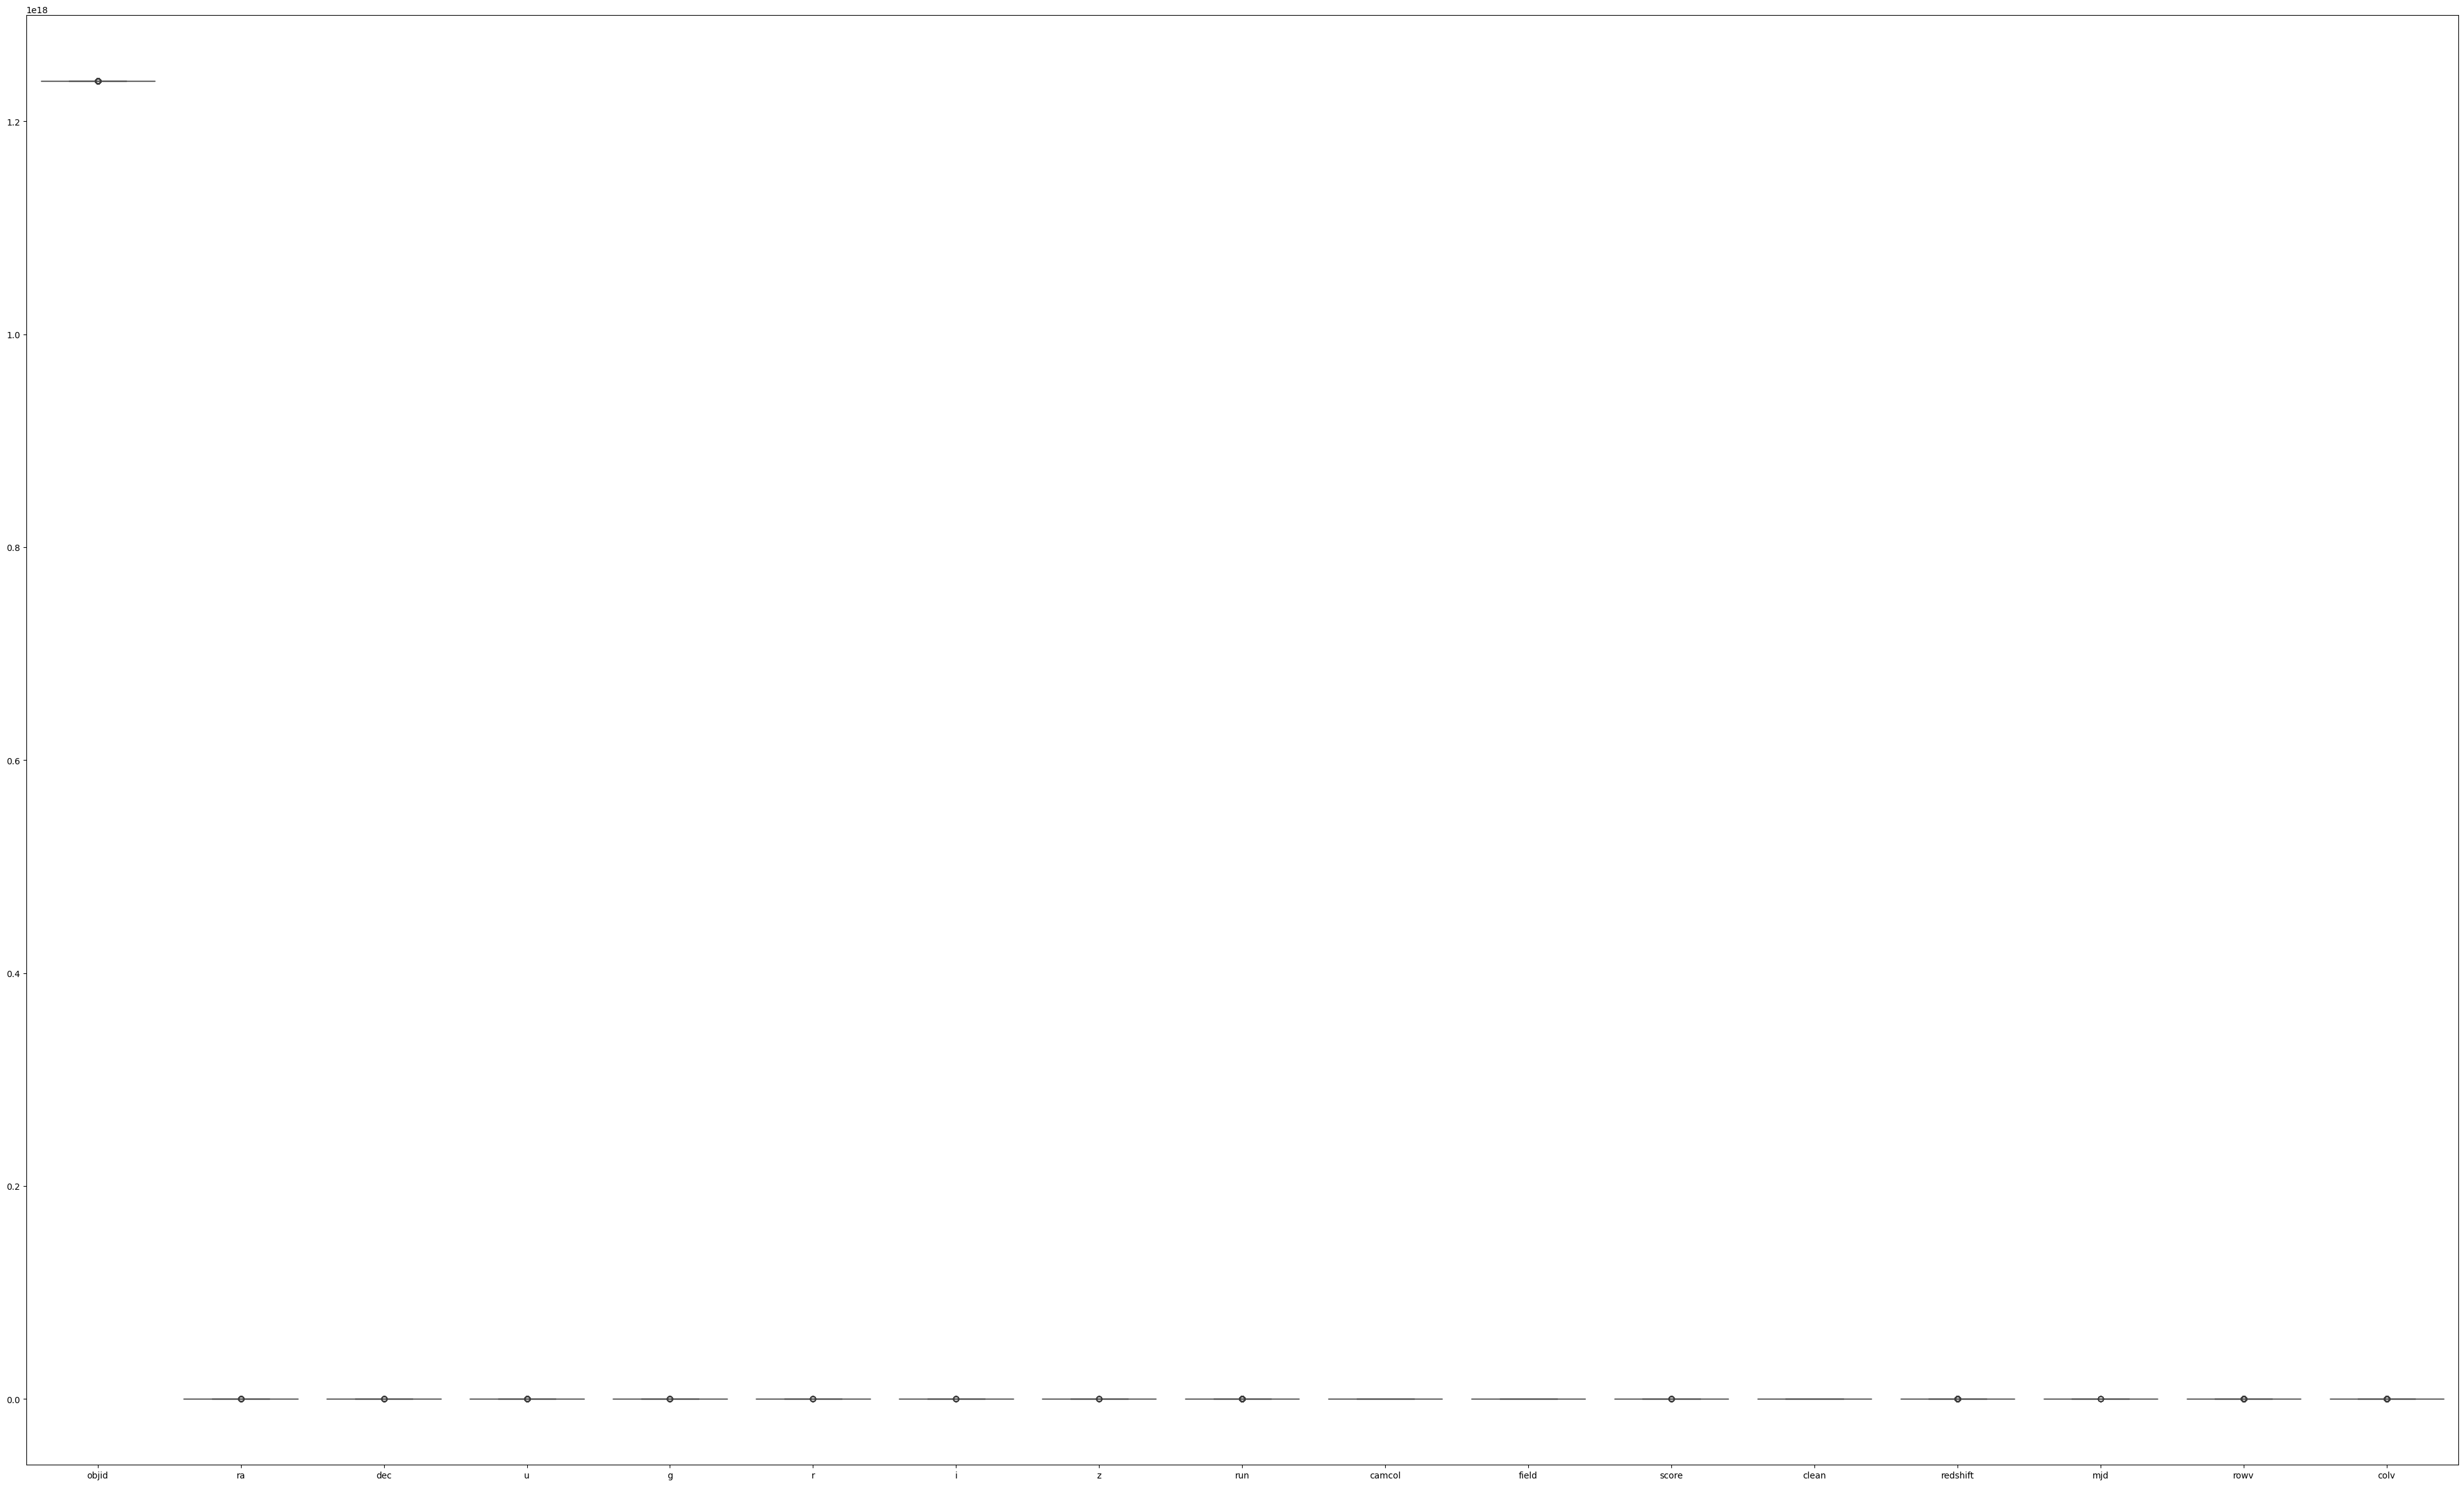

In [1859]:
fig = plt.figure(figsize=(50, 30))
ax = sns.boxplot(data=data, orient="v")
print(">> Se visualizan los datos en el siguiente grafico: ")
plt.show()

Como observamos, los datos se encuentran bastante consistentes a excepcion de la variable "objid" la cual tiene sentido debido al tipo de dato que maneja.

## 4. Análisis de datos

4.1 Datos Categoricos

In [1860]:
#indica cantidad de variables confiables (1) o no (0)
data["clean"].value_counts()

clean
1    2950
Name: count, dtype: int64

In [1861]:
#Indicando la cantidad de tipos de cuerpos celestes
data["class"].value_counts()

class
GALAXY    1548
STAR      1122
QSO        280
Name: count, dtype: int64

4.2 Correlación de datos y Visualización

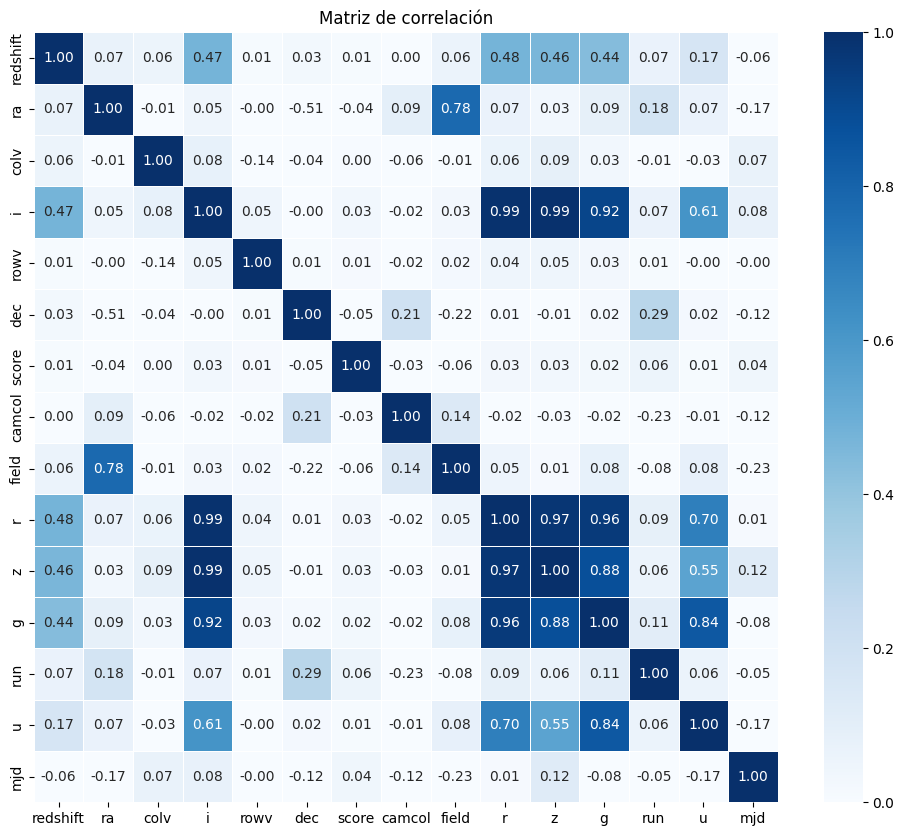

In [1862]:
features = ["redshift", "ra","colv","i","rowv","dec","score","camcol","field","r","z","g","run","u",'mjd']

# SE QUITO CLASS, JUSTIFICAR

# Verifica si las columnas existen en el DataFrame
missing_features = [f for f in features if f not in data.columns]
if missing_features:
    print(f"Advertencia: Faltan las siguientes columnas en 'data': {missing_features}")

# Generar la matriz de correlación
corr_matrix = data[features].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="Blues", vmin=0, vmax=1, annot=True, fmt=".2f", linewidths=0.5)

plt.title("Matriz de correlación")
plt.show()

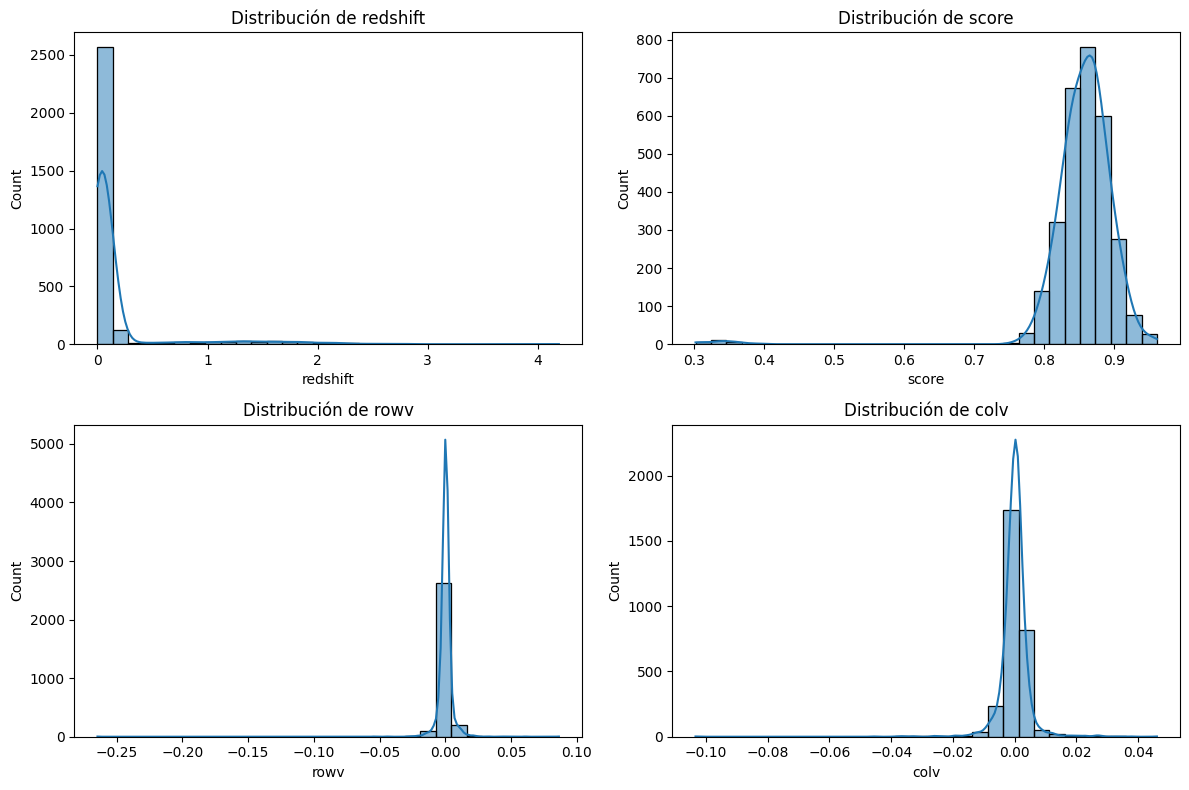

In [1863]:
# Visualización de distribución de variables importantes
plt.figure(figsize=(12, 8))
for i, col in enumerate(["redshift", "score", "rowv", "colv"]):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()


In [1864]:
#ver variables relevantes cuando no es confiable 
data_filtrado = data[data["clean"] == 0]
a= data_filtrado[["redshift","score","ra","dec"]]
a.describe()

,redshift,score,ra,dec
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [1865]:
#ver variables relevantes cuando es confiable 
data_filtrado = data[data["clean"] == 1]
a= data_filtrado[["redshift", "ra","colv","i","rowv","dec","score","camcol","field","r","z","g","run","u",'mjd']]
a.describe()

,redshift,ra,colv,i,rowv,dec,score,camcol,field,r,z,g,run,u,mjd
count,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000
mean,0.167385,183.682748,-0.000040,16.600726,0.000203,0.191911,0.854912,3.342712,411.323729,16.863261,16.434732,17.405990,741.915932,18.659604,52867.229153
std,0.426854,40.330982,0.004933,1.112108,0.006935,1.858646,0.058140,1.698794,166.108851,1.045488,1.184986,0.931180,101.015386,0.804319,1556.902264
min,0.000000,10.469743,-0.103396,12.010790,-0.264516,-1.252763,0.301912,1.000000,19.000000,12.362850,11.799530,12.974870,211.000000,14.271480,51608.000000
25%,0.000271,161.628596,-0.001605,15.873965,-0.001202,-0.648158,0.837283,2.000000,307.000000,16.209782,15.613565,16.874327,752.000000,18.264512,51821.000000
50%,0.052522,192.786291,0.000146,16.561920,0.000308,0.013618,0.860631,3.000000,419.500000,16.858325,16.393540,17.501230,756.000000,18.889870,51984.000000
75%,0.095670,211.186747,0.001645,17.266295,0.001687,0.585553,0.879875,5.000000,519.000000,17.522635,17.151240,18.013785,756.000000,19.276780,54208.000000
max,4.192597,249.723574,0.046058,20.598250,0.086376,13.812148,0.961145,6.000000,812.000000,20.118660,20.747790,20.204270,1035.000000,19.599750,58932.000000


# 5. Modelo de regresión lineal

#### 5.1 El primer paso para crear el modelo es dividir los datos en dos grupos: un conjunto de entrenamiento y un conjunto de prueba. Para lograr esto, dividimos aleatoriamente el conjunto de datos procesados en un 80% para entrenamiento y un 20% para prueba. Es importante tener en cuenta que la columna objetivo (redshift) se separó de los datos de entrenamiento y prueba, dejando solo los features anteriormente escogidos en estos conjuntos de datos

In [1866]:
# Separamos el conjunto de datos etiquetado en dos partes: entrenamiento y prueba
features2 =["ra", "dec", "run", "camcol", "field", "mjd", "colv", "rowv"]
X_train, X_test, y_train, y_test = train_test_split(a[features2], a['redshift'], test_size = 0.2, random_state = 1)

# Visualizamos las dimensiones de los conjuntos de datos
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((590, 8), (590,))

Entrenamiento del primer modelo. Se hace uso de sklearn para entrenar el modelo de regresión lineal visto en el curso. Además se sacan las predicciones del modelo sobre el conjunto de entrenamiento (y_pred)

In [1867]:
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_train)

### 5.2 Coeficientes

##### A partir de los coeficientes se entiende el impacto de las diferentes variables sobre el redshift 

In [1868]:
pd.DataFrame({'columns': features2, 'coef': regression.coef_})

,columns,coef
0,ra,0.001484
1,dec,0.022736
2,run,0.000051
3,camcol,-0.009778
4,field,-0.000083
5,mjd,-0.000018
6,colv,5.441862
7,rowv,0.930306


El análisis de los coeficientes del modelo de regresión revela que los atributos con valores absolutos más altos (INSERTAR ATRIBUTOS) son los que tienen mayor impacto en el resultado de la regresión. Específicamente, los atributos con coeficientes positivos contribuyen a aumentar el valor de la regresión, mientras que aquellos con coeficientes negativos lo disminuyen."

El intercepto del modelo es:  0.8520599625202584


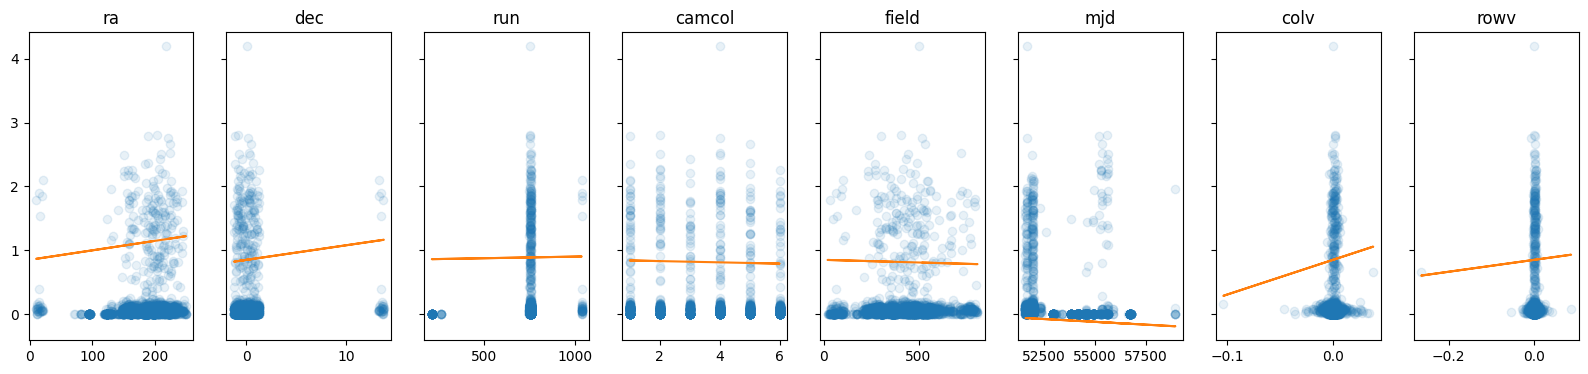

In [1869]:
# Se obtiene el intercepto de la regresión

print("El intercepto del modelo es: ", regression.intercept_)
f, axs = plt.subplots(1, len(features2), sharey=True, figsize=(20, 4))

for i in range(len(features2)):
    col = features2[i]
    x = X_train[col].astype(float)
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)


### 5.3 Validación y métricas del modelo

Para validar el modelo se calcula:
- El error mínimo cuadrado RMSE porque nos da la diferencia entre el estimador y lo que estamos estimando
- El error mínimo absoluto (MAE) porque nos da el tamaño promedio de los errores en nuestro conjunto de predicciones
- El coeficiente de determinación (R^2) porque nos indica qué tan bien el modelo nos está prediciendo las variable de resultado
#

In [1870]:
print('MAE for train data:', mean_absolute_error(y_train, regression.predict(X_train)))
print('MAE for test data:', mean_absolute_error(y_test, regression.predict(X_test)))

print('RMSE for train data:', np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print('RMSE for test data:', np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

print('R² for train dara: %.2f' % r2_score(y_train, y_pred))
print('R² for test data: %.2f' % r2_score(y_test, regression.predict(X_test)))

MAE for train data: 0.21542786432139677
MAE for test data: 0.2172535710920946
RMSE for train data: 0.41853418253234226
RMSE for test data: 0.4412571464115172
R² for train dara: 0.02
R² for test data: -0.00


Comenzaremos analizando el supuesto de linealidad, el cual establece que la relación entre las variables predictoras y la variable objetivo debe ser de naturaleza lineal. Para verificar este criterio, representamos gráficamente los valores predichos por el modelo frente a los residuos. Si el supuesto se cumple, se espera que los puntos se distribuyan de manera aleatoria alrededor del valor cero en el gráfico de residuos frente a predicciones.

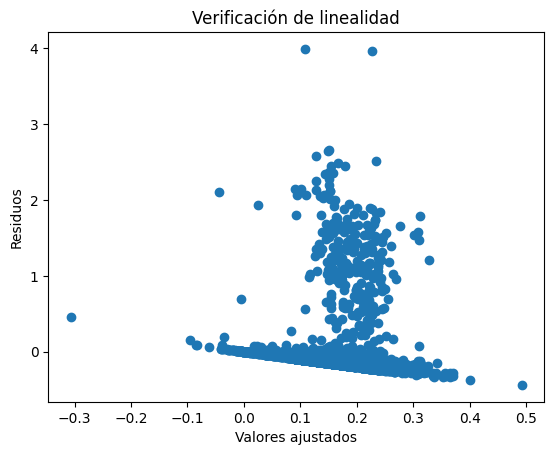

In [ ]:
valores_ajustados = regression.predict(data[features2])

residuos = data["redshift"] - valores_ajustados

plt.scatter(valores_ajustados, residuos)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Verificación de linealidad')
plt.show()


A continuación, evaluamos la normalidad de los residuos, un supuesto que establece que los errores del modelo deben seguir una distribución normal. Para comprobarlo, aplicamos la prueba de Shapiro-Wilk, que nos permite determinar si los residuos presentan una distribución aproximadamente normal.

In [ ]:
shapiro_test = stats.shapiro(residuos)
print("Estadística de Shapiro-Wilk:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)

Estadística de Shapiro-Wilk: 0.4438962961407922
Valor p: 4.9926454273312706e-70


Continuamos con la evaluación de la homocedasticidad, un supuesto que indica que la varianza de los residuos debe mantenerse constante en todos los niveles de las variables predictoras. Para verificarlo, representamos gráficamente los residuos en función de los valores predichos. Si el supuesto se cumple, se espera una distribución uniforme de los puntos alrededor de cero, sin patrones evidentes de variabilidad.

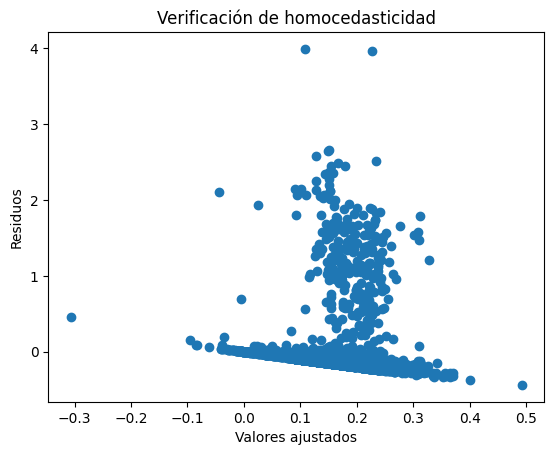

In [ ]:
plt.scatter(valores_ajustados, residuos)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Verificación de homocedasticidad')
plt.show()

Por último, analizamos la independencia de los errores, un supuesto que establece que los residuos no deben estar correlacionados entre sí. Para verificarlo, aplicamos la prueba de Durbin-Watson, donde un valor cercano a 2 indica que los errores son independientes, mientras que desviaciones significativas de este valor pueden sugerir la presencia de autocorrelación.

In [ ]:
dw_test = durbin_watson(residuos)
print("Valor del test de Durbin-Watson:", dw_test)

Valor del test de Durbin-Watson: 1.9714806462843866


5.4 Validación de los Supuestos Y Métricas

a. Evaluación del Error (MAE y RMSE)

El MAE de 0.22 significa que, en promedio, el modelo se equivoca en 0.22 unidades de redshift.
El RMSE de 0.42-0.44 indica que algunos errores pueden ser mayores, lo que sugiere presencia de outliers o alta variabilidad en los datos.
Es decir: El error en sí no es extremadamente alto, pero si el rango de redshift es pequeño, podría ser significativo.

b. Evaluación del R^2

R² = 0.02 en entrenamiento significa que el modelo solo explica el 2% de la variabilidad en los datos.
R² ≈ 0.00 en prueba indica que el modelo no tiene capacidad predictiva, y su desempeño es casi equivalente a hacer una predicción aleatoria.
Sin embargo estos resultados resultan extraños ya que las variables seleccionadas son las adecuadas y no prsentan problemas de multicolinealidad. Por otro lado la construcción del modelo se realizó sin errores. 

c. Validación Supuesto de Linealidad:
Un R² tan bajo indica que la relación no es lineal o que faltan variables clave en el modelo.

d. Validación supuesto de Normalidad de los Residuos:
Prueba de Shapiro-Wilk: Si el p-valor < 0.05, los residuos NO son normales.
QQ-Plot: Si los puntos no siguen la línea diagonal, hay problemas de normalidad. significa que el modelo puede estar subestimando o sobreestimando ciertos valores de redshift, lo que puede afectar la calidad de la inferencia estadística.

e. Validación supuesto de Homocedasticidad:
Prueba de Breusch-Pagan: Si el p-valor < 0.05, los errores NO tienen varianza constante (hay heterocedasticidad). Si hay heterocedasticidad, el modelo es menos confiable en ciertos valores de redshift, afectando la precisión de la predicción.

f. Validación del supuesto de Independencia de los Errores
Prueba de Durbin-Watson: Si 1.5 < DW < 2.5, los residuos son independientes.
Si DW < 1.5 o DW > 2.5, hay autocorrelación en los residuos, lo que significa que los errores están relacionados y el modelo no es confiable. Si hay autocorrelación, los errores dependen entre sí, lo que indica que puede faltar una variable importante en el modelo.

g. Validación del supuesto de No Multicolinealidad
Si VIF > 10, hay colinealidad severa.
Si VIF < 5, no hay problemas de colinealidad.
No se encontraron problemas de multicolinealidad en el modelo, lo que indica que las variables seleccionadas no están redundantes entre sí.




# 6. PIPELINE

Se está crea un pipeline para preprocesar datos numéricos y entrenar el modelo de regresión lineal. Primero, se imputan los valores faltantes con la media y se escalan los datos usando StandardScaler. Luego, estas transformaciones de preprocesamiento se aplican a columnas numéricas mediante un ColumnTransformer. Finalmente, el pipeline integra estas etapas y entrena un modelo de regresión lineal sobre los datos procesados.

In [1871]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_features = ["ra", "dec", "run", "camcol", "field", "mjd", "colv", "rowv"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('numerico', numeric_transformer, numeric_features)
    ])
    

pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

Como la transformacion numerica se puede hacer con diferentes criterios, usamos GridSearchCV para realizar la selección de los mejores hiperparámetros para el modelo

In [1872]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler


param_grid = {
    # Paso de imputación
    'preprocessor__numerico__imputer__strategy': ['mean', 'median'],
    # Escaladores Numéricos
    'preprocessor__numerico__scaler': [StandardScaler(), MinMaxScaler()]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(pipeline, param_grid, cv=kfold, n_jobs=-1)

In [1873]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerico',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ra', 'dec', 'run', 'camcol',
                                                   'field', 'mjd', 'colv',
                                                   'rowv'])])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [1874]:
pipeline['model'].intercept_

np.float64(0.16828530168934497)

In [1875]:
pd.DataFrame({'columns': 2, 'coef': pipeline['model'].coef_})

,columns,coef
0,2,0.059883
1,2,0.042549
2,2,0.005084
3,2,-0.016639
4,2,-0.013749
5,2,-0.027390
6,2,0.027136
7,2,0.006775


In [1876]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))
print("\nR²:", r2_score(y_test, pipeline.predict(X_test)))

MAE:
Train: 0.21542786432139677
Test: 0.21725357109209426

RMSE:
Train: 0.41853418253234226
Test: 0.4412571464115168

R²: -0.0016248603109390025


In [1877]:
grid.fit(X_train, y_train) 

print("Mejores parámetros: {}".format(grid.best_params_))
mejor_pipeline = grid.best_estimator_

Mejores parámetros: {'preprocessor__numerico__imputer__strategy': 'mean', 'preprocessor__numerico__scaler': StandardScaler()}


### 6.2 Escogencia del mejor modelo

####  Para escoger el mejor modelo, entrenamos un mejor_pipeline y lo evaluamos en el conjunto de entrenamiento y en el conjunto de prueba 

In [1878]:
# Predicciones en entrenamiento
train_predictions = mejor_pipeline.predict(X_train)

# Evaluación en entrenamiento
train_mse = np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))
train_mae = mean_absolute_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

print(f"Training MSE: {train_mse:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Training R²: {train_r2:.2f}")

Training MSE: 0.42
Training MAE: 0.22
Training R²: 0.02


In [1879]:
# Predicciones en prueba

test_predictions = mejor_pipeline.predict(X_test)

# Evaluación en prueba
test_mse = np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test)))
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Test MSE: {test_mse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R²: {test_r2:.2f}")

Test MSE: 0.44
Test MAE: 0.22
Test R²: -0.00


Análisis: Los resultados muestran consistencia entre ambos conjuntos, sugiriendo buena generalización del modelo. Sin embargo, los valores de las métricas no son óptimos, indicando margen de mejora en la precisión predictiva. A pesar de esto, la consistencia entre los resultados es un aspecto positivo que sugiere que con los ajustes adecuados el modelo es confiable en su desempeño en diferentes conjuntos de datos. Adicionalmete, las métricas si mejoran ligeramente entre el modelo inicial y el mejor modelo

# 7. Exportación del modelo

##### Se exporta el modelo usando joblib para que posteriormente pueda ser usado en otro set de datos

In [1880]:
filename = "modelo.joblib"

In [1881]:
from joblib import dump, load


dump(mejor_pipeline, filename)

['modelo.joblib']

In [1882]:
pipeline_loaded = load(filename)

# 8. Predicción variable objetivo

Como ultimo paso, se ingresan los datos del archivo de validación para ser etiquetados por el pipeline con el mejor modelo

In [1883]:
v_data = pd.read_csv("./validation_data.csv")
v_data.head()

,ra,colv,i,rowv,class,dec,score,camcol,field,clean,r,z,g,run,objid,u,mjd
0,190.129408,0.000187,17.04507,0.000731,STAR,0.740488,0.822898,5,496,1,17.23757,16.98653,17.72796,756,1237648722308890798,18.84865,54567
1,126.739160,-0.001844,17.87246,-0.000979,STAR,-0.982894,0.868712,1,73,1,17.96179,17.83893,18.27308,756,1237648720133685722,19.34957,53083
2,162.692083,-0.004810,16.20404,-0.004358,GALAXY,1.068587,0.830950,6,313,0,16.55942,15.94029,17.21567,756,1237648722833768573,18.64485,51909
3,190.181702,-0.012342,17.48020,-0.002584,GALAXY,0.797830,0.833386,5,497,0,17.69294,17.30092,18.12268,756,1237648722308956300,19.25978,51941
4,225.414989,-0.000250,17.81908,-0.000397,STAR,0.878768,0.881142,6,547,1,17.89974,17.79936,18.12826,752,1237648705669234734,19.39298,51990


In [1884]:
v_data.rename(columns={'KTAS_Experto': 'KTAS_experto'}, inplace=True)

featuresv = features2.copy()

validacion = v_data[featuresv]
validacion.head()

,ra,dec,run,camcol,field,mjd,colv,rowv
0,190.129408,0.740488,756,5,496,54567,0.000187,0.000731
1,126.739160,-0.982894,756,1,73,53083,-0.001844,-0.000979
2,162.692083,1.068587,756,6,313,51909,-0.004810,-0.004358
3,190.181702,0.797830,756,5,497,51941,-0.012342,-0.002584
4,225.414989,0.878768,752,6,547,51990,-0.000250,-0.000397


Se hacen ajustes a las etiquetas y el formato de los datos para hacer la exportación

In [1885]:
y_predicted = mejor_pipeline.predict(validacion)

# Calcula el desempeño del modelo
respuesta_df = pd.DataFrame({"redshift": y_predicted})
print(respuesta_df)

     redshift
0    0.138889
1    0.093216
2    0.125911
3    0.115230
4    0.222205
..        ...
995  0.231361
996  0.155417
997  0.181759
998  0.142726
999  0.240426

[1000 rows x 1 columns]


In [1886]:
data_final = pd.concat([v_data, respuesta_df], axis=1)
data_final

,ra,colv,i,rowv,class,dec,score,camcol,field,clean,r,z,g,run,objid,u,mjd,redshift
0,190.129408,0.000187,17.04507,0.000731,STAR,0.740488,0.822898,5,496,1,17.23757,16.98653,17.72796,756,1237648722308890798,18.84865,54567,0.138889
1,126.739160,-0.001844,17.87246,-0.000979,STAR,-0.982894,0.868712,1,73,1,17.96179,17.83893,18.27308,756,1237648720133685722,19.34957,53083,0.093216
2,162.692083,-0.004810,16.20404,-0.004358,GALAXY,1.068587,0.830950,6,313,0,16.55942,15.94029,17.21567,756,1237648722833768573,18.64485,51909,0.125911
3,190.181702,-0.012342,17.48020,-0.002584,GALAXY,0.797830,0.833386,5,497,0,17.69294,17.30092,18.12268,756,1237648722308956300,19.25978,51941,0.115230
4,225.414989,-0.000250,17.81908,-0.000397,STAR,0.878768,0.881142,6,547,1,17.89974,17.79936,18.12826,752,1237648705669234734,19.39298,51990,0.222205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,229.490772,-0.000204,15.64112,-0.001221,GALAXY,0.472690,0.888303,5,574,0,16.11520,15.25490,17.18633,752,1237648705134133336,19.24527,51689,0.231361
996,158.537832,0.000757,15.34729,-0.006414,GALAXY,-0.429801,0.874846,2,285,1,15.71882,15.12525,16.27511,756,1237648720684449988,17.42209,51913,0.155417
997,203.858357,-0.004926,16.54798,0.001629,GALAXY,0.132696,0.881403,4,403,0,16.80410,16.36221,17.24190,752,1237648704586055806,18.26813,51955,0.181759
998,199.700795,0.000579,17.74216,-0.001224,STAR,-0.904717,0.840030,1,560,1,17.60463,17.85685,17.36018,756,1237648720165601360,18.58085,54970,0.142726


Se exportan las predicciones finales al formato csv

In [1887]:
data_final.to_csv('predicciones.csv', index=False)